In [54]:
from keras.models import Sequential
from keras.layers import Activation,Dense,Conv2D,MaxPooling2D,UpSampling2D,Flatten,Reshape
from IPython.display import Image, SVG
from keras.utils.vis_utils import model_to_dot
import numpy as np

In [55]:
mnist= np.load('mnist.npz')

In [56]:
mnist.files

['x_test', 'x_train', 'y_train', 'y_test']

In [57]:
x_train,x_test=mnist['x_train'],mnist['x_test']

In [58]:
# normalize the data
max_value_mnsit= float(x_train.max())
x_train = x_train.astype('float32')/max_value_mnsit
x_test = x_test.astype('float32')/max_value_mnsit


In [59]:
# reshape the data
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[1],1)
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[1],1)

In [60]:
# simple autoencoder
input_dim= x_train.shape[1]
encoded_dim =32
compress_factor = float(input_dim/ encoded_dim)

print("compress factor is {}".format(compress_factor))

compress factor is 0.875


In [63]:
auto_encoder = Sequential()


auto_encoder.add(Conv2D(16,(3,3), activation='relu',padding='same',input_shape=x_train.shape[1:]))
auto_encoder.add(MaxPooling2D(pool_size=(2,2)))
auto_encoder.add(Conv2D(8,(3,3),activation='relu',padding='same'))
auto_encoder.add(MaxPooling2D(pool_size=(2,2)))
auto_encoder.add(Conv2D(8,(3,3),activation='relu',padding='same',strides=(2,2)))

auto_encoder.add(Flatten())
auto_encoder.add(Reshape((4,4,8)))

auto_encoder.add(Conv2D(8,(3,3),activation='relu',padding='same'))
auto_encoder.add(UpSampling2D((2,2)))
auto_encoder.add(Conv2D(8,(3,3),activation='relu',padding='same'))
auto_encoder.add(UpSampling2D((2,2)))
auto_encoder.add(Conv2D(16,(3,3),activation='relu'))
auto_encoder.add(UpSampling2D((2,2)))
auto_encoder.add(Conv2D(1,(3,3),activation='sigmoid',padding='same'))

auto_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 4, 4, 8)           0         
__________

In [64]:
auto_encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 8)           584       
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)               0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 4, 4, 8)           0         
__________

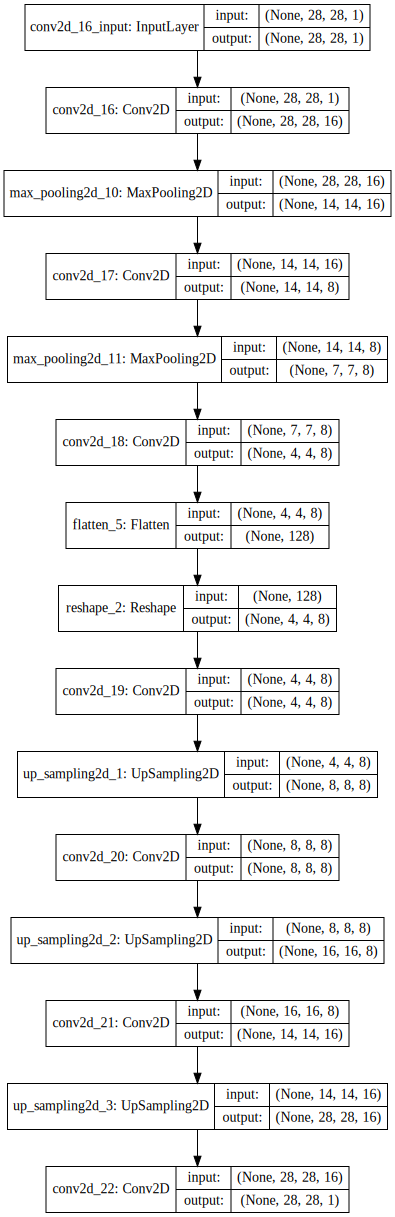

In [65]:
SVG(model_to_dot(auto_encoder,show_shapes=True).create(prog='dot',format='svg'))

In [66]:
auto_encoder.compile(optimizer='adam', loss='binary_crossentropy')

In [68]:
auto_encoder.fit(x_train,x_train,validation_data=(x_test,x_test),batch_size=128,epochs=1,shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 58s - loss: 0.1376 - val_loss: 0.1257


In [69]:
x_test_image=np.random.randint(x_test.shape[1],size=10)

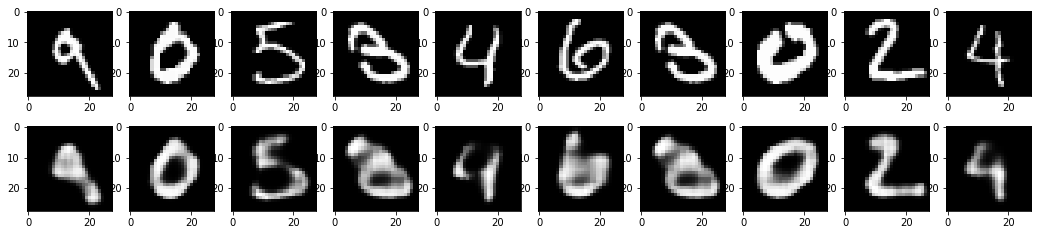

In [71]:
# decoded images
decond_img=auto_encoder.predict(x_test) 
import matplotlib.pyplot as plt

plt.figure(figsize=(18,6))
for i,images_test in enumerate(x_test_image):
    
    ax=plt.subplot(3,10,i+1)
    plt.imshow(x_test[images_test].reshape(28,28))
    plt.gray()
    
    
    ax=plt.subplot(3,10,10+i+1)
    plt.imshow(decond_img[images_test].reshape(28,28))
    plt.gray()
    
    